## Deep Learning ChatBot

    Table Of Contents : 
        - Loading Data
        - Splitting the data into sentences , labels , responses
        - Simple Baseline Using Logistic Regression
        - Encoding The Data Labels
        - NLP Text Tokannize , clean
        - Neural Network Baseline
        - Neural Model Using Embedding Layer
        - Model With Deep Neural Network
        - Model With CNN & Embedding
        - Sentment Analysis
        - Naive Bayes & Random Forest Classifier
        - Chat Demo

### Importing Libraries 

In [1]:
import json 
import numpy as np 
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D , GlobalMaxPooling1D,Flatten ,Conv1D, Dropout , Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Intents Files  

In [2]:
with open('intents.json') as file:
    data = json.load(file)

### Splitting the data into sentences , labels , responses 

In [3]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [4]:
len(set(training_labels))

46

In [5]:
training_sentences

['What to do if Cuts?',
 'How to cure Cuts?',
 'Which medicine to apply for Cuts?',
 'what to apply on cuts?',
 'Cuts',
 'Hi',
 'How are you',
 'Is anyone there?',
 'Hello',
 'Whats up',
 'cya',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Have a Good day',
 'bye',
 'how do you treat abrasions?',
 'Do Abrasions cause scars?',
 'Abrasions',
 'what to do if abrasions?',
 'Which medicine to apply for abrasions?',
 'How to cure abrasions?',
 'How do you treat Sting?',
 'Stings',
 'What to do if you get a sting?',
 'Which medicine to apply if sting?',
 'How to remove Splinters',
 'How to cure Splinters?',
 'What to do if I have splinters?',
 'How do you bring a splinter to the surface?',
 'How do you treat a sprain?',
 'what to do if i get a sprain?',
 'Which cream to apply if i get a sprain?',
 'Which medicine to apply if I get a sprain?',
 'How do you treat a strain?',
 'what to do if i get a strain?',
 'Which cream to apply if i get a strain?',
 'Which medicine to apply if I get a st

In [6]:
training_labels

['Cuts',
 'Cuts',
 'Cuts',
 'Cuts',
 'Cuts',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'stings',
 'stings',
 'stings',
 'stings',
 'Splinter',
 'Splinter',
 'Splinter',
 'Splinter',
 'Sprains',
 'Sprains',
 'Sprains',
 'Sprains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Fever',
 'Fever',
 'Fever',
 'Fever',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Cough',
 'Cough',
 'Cough',
 'Cough',
 'Cough',
 'Sore Throat',
 'Sore Throat',
 'Sore Throat',
 'Sore Throat',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Skin problems',
 'Skin problems',
 'Skin problems',
 'Skin problems',
 'Abdonominal Pain',
 'Abdonominal Pain',
 'Ab

----
### Simple Baseline Using Logistic Regression 

In [7]:
sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sentences_vectorizer = CountVectorizer()
sentences_vectorizer.fit(sentences_train)
Xlr_train = sentences_vectorizer.transform(sentences_train)
Xlr_test  = sentences_vectorizer.transform(sentences_test)
Xlr_train 

<159x129 sparse matrix of type '<class 'numpy.int64'>'
	with 900 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(Xlr_train, label_train)

score_train = LRmodel.score(Xlr_train, label_train)

score_test = LRmodel.score(Xlr_test, label_test)

print("Accuracy Train :", score_train) 
print("Accuracy Test :", score_test) 

Accuracy Train : 0.9874213836477987
Accuracy Test : 0.575


----------------------------------
### Encoding The Data Labels

In [10]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)
training_labels

array([ 9,  9,  9,  9,  9, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40,  1,
        1,  1,  1,  1,  1, 45, 45, 45, 45, 31, 31, 31, 31, 32, 32, 32, 32,
       33, 33, 33, 33, 33, 33, 14, 14, 14, 14, 23, 23, 23, 23, 23, 23,  8,
        8,  8,  8,  8, 30, 30, 30, 30, 17, 17, 17, 17, 29, 29, 29, 29,  0,
        0,  0,  0,  3,  3,  3,  3,  2,  2,  2,  2,  6,  6,  6,  6, 38, 38,
       38, 38, 10, 10, 10, 10, 16, 16, 16, 16, 20, 20, 20, 20, 21, 21, 21,
       21, 22, 22, 22, 22, 42, 42, 42, 42, 26, 26, 26, 26, 28, 28, 28, 28,
       34, 34, 34, 34, 36, 36, 36, 36, 37, 37, 37, 37, 24, 24, 24, 24, 12,
       12, 12, 12,  5,  5,  5,  5, 25, 25, 25, 25, 35, 35, 35, 35, 43, 43,
       43, 43, 18, 18, 18, 18, 13, 13, 13, 13, 19, 19, 19, 19,  7,  7,  7,
        7, 27, 27, 27, 27, 44, 44, 44, 44, 44, 39, 39, 39, 39, 39, 39, 39,
       11, 11, 11, 11,  4,  4,  4,  4, 15, 15, 15, 15])

### NLP Text Tokannize , clean 

In [11]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) # adding out of vocabulary token
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

### Neural Network Baseline

In [12]:
baseline = Sequential()
baseline.add(Dense(128, activation='relu'))
baseline.add(Dense(128, activation='relu'))
baseline.add(Dense(num_classes, activation='softmax'))


baseline.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_nn = baseline.fit(padded_sequences,np.array(training_labels), epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 10.3711 - accuracy: 0.0402
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 6.2452 - accuracy: 0.0352
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 4.8154 - accuracy: 0.0754
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 3.9556 - accuracy: 0.0804
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 3.4865 - accuracy: 0.1206
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 3.2163 - accuracy: 0.1357
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.9567 - accuracy: 0.1859
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.8611 - accuracy: 0.1960
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.7124 - accuracy: 0.2060
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 2.6363 - accuracy: 0.2412


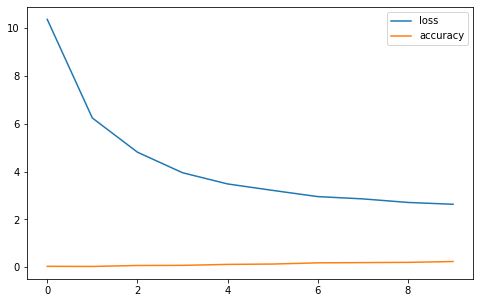

In [13]:
pd.DataFrame(baseline_nn.history).plot(figsize=(8,5))
plt.show()

### Buidling The Neural Model Using Embedding Layer 

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 46)                782       
                                                                 
Total params: 17,326
Trainable params: 17,326
Non-trainable params: 0
__________________________________________________

### Train The Model On Our Data
    - adding the early stop to know the proper epoch count , starting after 200

In [16]:
epochs = 300
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200)
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs , callbacks=[es])

Epoch 1/300
7/7 [==============================] - 1s 3ms/step - loss: 3.8294 - accuracy: 0.0201
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8283 - accuracy: 0.0201
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8277 - accuracy: 0.0352
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8271 - accuracy: 0.0352
Epoch 5/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8268 - accuracy: 0.0251
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 3.8261 - accuracy: 0.0352
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8256 - accuracy: 0.0352
Epoch 8/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8250 - accuracy: 0.0352
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 3.8245 - accuracy: 0.0352
Epoch 10/300
7/7 [==============================] - 0s 3ms/step - loss: 3.8239 - accuracy: 0.0352
Epoch 11/300
7/7 [===========

7/7 [==============================] - 0s 3ms/step - loss: 2.5664 - accuracy: 0.2915
Epoch 85/300
7/7 [==============================] - 0s 3ms/step - loss: 2.5356 - accuracy: 0.3065
Epoch 86/300
7/7 [==============================] - 0s 3ms/step - loss: 2.5066 - accuracy: 0.2864
Epoch 87/300
7/7 [==============================] - 0s 3ms/step - loss: 2.4743 - accuracy: 0.3317
Epoch 88/300
7/7 [==============================] - 0s 3ms/step - loss: 2.4425 - accuracy: 0.3668
Epoch 89/300
7/7 [==============================] - 0s 3ms/step - loss: 2.4126 - accuracy: 0.3467
Epoch 90/300
7/7 [==============================] - 0s 3ms/step - loss: 2.3821 - accuracy: 0.3417
Epoch 91/300
7/7 [==============================] - 0s 3ms/step - loss: 2.3524 - accuracy: 0.3216
Epoch 92/300
7/7 [==============================] - 0s 3ms/step - loss: 2.3218 - accuracy: 0.3417
Epoch 93/300
7/7 [==============================] - 0s 3ms/step - loss: 2.2916 - accuracy: 0.3869
Epoch 94/300
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.9749
Epoch 168/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.9598
Epoch 169/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.9548
Epoch 170/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.9648
Epoch 171/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.9749
Epoch 172/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.9497
Epoch 173/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.9548
Epoch 174/300
7/7 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.9598
Epoch 175/300
7/7 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.9648
Epoch 176/300
7/7 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.9849
Epoch 177/300
7/7 [=====

7/7 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9950
Epoch 250/300
7/7 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 1.0000
Epoch 251/300
7/7 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 1.0000
Epoch 252/300
7/7 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 1.0000
Epoch 253/300
7/7 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 1.0000
Epoch 254/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9950
Epoch 255/300
7/7 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9950
Epoch 256/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 1.0000
Epoch 257/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 1.0000
Epoch 258/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 1.0000
Epoch 259/300
7/7 [=====

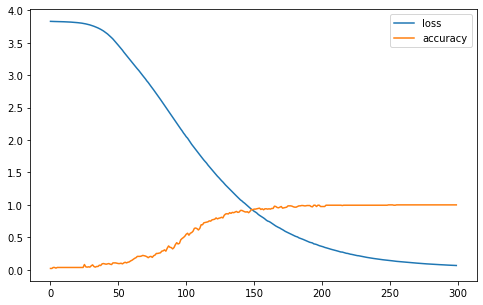

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Saving The Model , Tokenizer , Encoded Labels

In [18]:
import pickle

model.save("chat_model")

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


---------
### Build The Model With Deep Neural Network

In [19]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json', encoding='utf-8').read()

for intent in data['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)

        documents.append((w, intent['tag']))


        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)

print (len(words), "unique words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

199 documents
46 classes ['Abdonominal Pain', 'Abrasions', 'Broken Toe', 'Bruises', 'CPR', 'Chemical Burn', 'Choking', 'Cold', 'Cough', 'Cuts', 'Diarrhea', 'Drowning', 'Eye Injury', 'Fainting', 'Fever', 'Fracture', 'Frost bite', 'Gastrointestinal problems', 'Head Injury', 'Headache', 'Heat Exhaustion', 'Heat Stroke', 'Insect Bites', 'Nasal Congestion', 'Normal Bleeding', 'Poison', 'Pulled Muscle', 'Rash', 'Rectal bleeding', 'Skin problems', 'Sore Throat', 'Splinter', 'Sprains', 'Strains', 'Sun Burn', 'Teeth', 'Testicle Pain', 'Vertigo', 'Wound', 'animal bite', 'goodbye', 'greeting', 'nose bleed', 'seizure', 'snake bite', 'stings']
138 unique words ['a', 'abdonominal', 'abrasion', 'allergy', 'am', 'an', 'animal', 'anyone', 'apply', 'are', 'better', 'bit', 'bite', 'bitten', 'bleed', 'bleeding', 'blocked', 'bring', 'broken', 'bruise', 'burn', 'by', 'bye', 'cause', 'chemical', 'choke', 'choked', 'choking', 'cold', 'congestion', 'cough', 'cpr', 'cream', 'cure', 'cut', 'cya', 'day', 'diagnos

In [20]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:

    bag = []

    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)


    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)
training

<ipython-input-20-267d94db582c>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


array([[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [list([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [21]:
train_x = list(training[:,0])
train_y = list(training[:,1])
sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

In [22]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
40/40 [==============================] - 1s 3ms/step - loss: 3.8553 - accuracy: 0.0101
Epoch 2/150
40/40 [==============================] - 0s 3ms/step - loss: 3.8024 - accuracy: 0.0553
Epoch 3/150
40/40 [==============================] - 0s 4ms/step - loss: 3.7322 - accuracy: 0.0704
Epoch 4/150
40/40 [==============================] - 0s 5ms/step - loss: 3.6716 - accuracy: 0.0804
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 3.5642 - accuracy: 0.2010
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 3.4184 - accuracy: 0.2161
Epoch 7/150
40/40 [==============================] - 0s 3ms/step - loss: 3.2333 - accuracy: 0.2613
Epoch 8/150
40/40 [==============================] - 0s 3ms/step - loss: 2.9707 - accuracy: 0.3668
Epoch 9/150
40/40 [==============================] - 0s 3ms/step - loss: 2.6556 - accuracy: 0.4020
Epoch 10/150
40/40 [==============================] - 0s 3ms/step - loss: 2.2833 - accuracy: 0.5025
Epoch 11/

40/40 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 83/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9849
Epoch 84/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 85/150
40/40 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9950
Epoch 86/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9950
Epoch 87/150
40/40 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9899
Epoch 88/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9950
Epoch 89/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 90/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9899
Epoch 91/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 92/150


In [23]:
loss, accuracy = model.evaluate(np.array(train_x), np.array(train_y), verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000


NameError: name 'textcnnmodel' is not defined

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

------
## Build The Model With Conv

In [ ]:
from keras.preprocessing.text import Tokenizer


sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
Xcnn_train = tokenizer.texts_to_sequences(sentences_train)
Xcnn_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  
print(sentences_train[1])
print(Xcnn_train[1]) 

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :]) 

In [ ]:
embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(Conv1D(128, 5, activation='relu'))
textcnnmodel.add(GlobalMaxPooling1D())
textcnnmodel.add(Dense(10, activation='relu'))
textcnnmodel.add(Dense(1, activation='sigmoid'))

textcnnmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
textcnnmodel.summary() 

In [ ]:

textmodel = textcnnmodel.fit(Xcnn_train, np.array(label_train),epochs=50,verbose=1,validation_data=(Xcnn_test, label_test),batch_size=10)

loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
pd.DataFrame(textmodel.history).plot(figsize=(8,5))
plt.show()

------
### Sentment Analysis

In [ ]:
df = pd.read_excel('classify.xlsx')

In [ ]:
df.head(15)

In [ ]:
import neattext.functions as nf

df['Unnamed: 2'] = df['Unnamed: 2'].apply(nf.clean_text)

In [ ]:
cleaned_data = [sentence for sentence in df['Unnamed: 2']]
cleaned_data

In [ ]:
## Data Transformation 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1400)
x = cv.fit_transform(cleaned_data).toarray()
y = df.iloc[:,-2].values

In [ ]:
## Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

In [ ]:
# Test
y_pred = nb_model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])


In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = nb_model.predict(X_test)

accuracy_score(y_test,y_pred)

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

# Test
y_pred = rf_model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

In [ ]:
accuracy_score(y_test,y_pred)

-----
## Demo

In [ ]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import random
import pickle

with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print("User: " ,end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print("Mosif ChatBot:" , np.random.choice(i['responses']))

print("Start messaging with the Mosif bot (type quit to stop)!")
chat()

Start messaging with the Mosif bot (type quit to stop)!
User: 